<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Description" data-toc-modified-id="Data-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Important-Scripts" data-toc-modified-id="Important-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Important Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Log-transform-large-values" data-toc-modified-id="Log-transform-large-values-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Log transform large values</a></span></li><li><span><a href="#Train-Test-split-after-log-transform" data-toc-modified-id="Train-Test-split-after-log-transform-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Train-Test split after log transform</a></span></li><li><span><a href="#Scaling-the-Data" data-toc-modified-id="Scaling-the-Data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Scaling the Data</a></span></li><li><span><a href="#GBR-Modelling" data-toc-modified-id="GBR-Modelling-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>GBR Modelling</a></span></li><li><span><a href="#GBR-modelling-using-pipeline" data-toc-modified-id="GBR-modelling-using-pipeline-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>GBR modelling using pipeline</a></span></li><li><span><a href="#Cross-Validation-Results" data-toc-modified-id="Cross-Validation-Results-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Cross Validation Results</a></span></li><li><span><a href="#HPO-(Hyper-Parameters-Optimization)" data-toc-modified-id="HPO-(Hyper-Parameters-Optimization)-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>HPO (Hyper Parameters Optimization)</a></span><ul class="toc-item"><li><span><a href="#Grid-Search-for-Gradient-Boosting-Regressor" data-toc-modified-id="Grid-Search-for-Gradient-Boosting-Regressor-11.1"><span class="toc-item-num">11.1&nbsp;&nbsp;</span>Grid Search for Gradient Boosting Regressor</a></span></li></ul></li><li><span><a href="#Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor" data-toc-modified-id="Hyper-Parameter-using-hyperopt-sklearn-for-Gradient-Boosting-Regressor-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Hyper Parameter using hyperopt-sklearn for Gradient Boosting Regressor</a></span></li><li><span><a href="#Scale-data-for-hyperparameter-tuning" data-toc-modified-id="Scale-data-for-hyperparameter-tuning-13"><span class="toc-item-num">13&nbsp;&nbsp;</span>Scale data for hyperparameter tuning</a></span><ul class="toc-item"><li><span><a href="#HPO-without-scaling-the-data" data-toc-modified-id="HPO-without-scaling-the-data-13.1"><span class="toc-item-num">13.1&nbsp;&nbsp;</span>HPO without scaling the data</a></span></li></ul></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Data Description

This dataset contains house sale prices for King County,
which includes Seattle.
It includes homes sold between May 2014 and May 2015.

- Dependent features: 1 (price)
- Features : 19 home features
- Id:  1 house ID

Task: Try to estimate the price based on given features.

![](https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/data/raw/data_description.png?raw=1)

## Model Introduction
The term `Boosting` refers to a family of algorithms which converts weak learner to strong learners.

There are many boosting algorithms:
```
sklearn.ensemble.GradientBoostingRegressor
xgboost.XGBRegressor # fast and best
lightgbm.LGBMRegressor # extreme fast, little acc than xgb
catboost.CatBoostRegressor # good for categorical feats
```

- [catboost examples](https://catboost.ai/docs/concepts/python-usages-examples.html)

# Imports

In [244]:
import sys
ENV_BHISHAN = None

try:
    import bhishan
    print('Environment: Personal environment')
    ENV_BHISHAN = True
    %load_ext autoreload
    %autoreload 2
except:
    print('Module "bhishan" not found.')

Module "bhishan" not found.


In [245]:
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    #!pip install hpsklearn
    !pip install shap eli5
    !pip install catboost
    !pip install ipywidgets
    !jupyter nbextension enable --py widgetsnbextension

    # set OMP_NUM_THREADS=1 for hpsklearn package
    #!export OMP_NUM_THREADS=1
    print('Environment: Google Colab')

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK
Environment: Google Colab


In [246]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# random state
SEED=100
np.random.seed(SEED) # we need this in each cell


# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
# pd.set_option('display.float_format', '{:,.4f}'.format) # numbers sep by comma
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 200)

print([(x.__name__,x.__version__) for x in [np, pd,sns,matplotlib]])

[('numpy', '1.17.4'), ('pandas', '0.25.3'), ('seaborn', '0.9.0'), ('matplotlib', '3.1.1')]


In [247]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [248]:
import scipy
import sklearn

print([(x.__name__,x.__version__) for x in [scipy, sklearn]])

[('scipy', '1.3.2'), ('sklearn', '0.21.3')]


In [0]:
# scale and split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
# pipeline
from sklearn.pipeline import Pipeline

In [251]:
# boosting
import xgboost as xgb
import lightgbm as lgb
import catboost

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier, DMatrix
from lightgbm import LGBMClassifier, Dataset
from catboost import CatBoostClassifier, Pool, CatBoost

print([(x.__name__,x.__version__) for x in [xgb, lgb,catboost]])

[('xgboost', '0.90'), ('lightgbm', '2.2.3'), ('catboost', '0.19.1')]


In [0]:
# six and pickle
import six
import pickle
import joblib

In [0]:
# metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [0]:
# cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [0]:
df_eval = pd.DataFrame({'Model': [],
                        'Details':[],
                        'Train Neg MSE K-Fold Cross Validation':[],
                        'Test RMSE':[],
                        'Test Explained Variance Score':[],
                        'Test R-squared':[],
                        'Test Adjusted R-squared':[],
                        })

In [0]:
# model evaluation using snap
import shap
# shap_values = shap.TreeExplainer(model_xgb).shap_values(Xtest)
# shap.summary_plot(shap_values, Xtest)
# shap.dependence_plot("column_name", shap_values, Xtest)

# Important Scripts

In [0]:
def show_method_attributes(obj, ncols=7,start=None, inside=None):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_method_attributes(list)
     """

    print(f'Object Type: {type(obj)}\n')
    lst = [elem for elem in dir(obj) if elem[0]!='_' ]
    lst = [elem for elem in lst 
           if elem not in 'os np pd sys time psycopg2'.split() ]

    if isinstance(start,str):
        lst = [elem for elem in lst if elem.startswith(start)]
        
    if isinstance(start,tuple) or isinstance(start,list):
        lst = [elem for elem in lst for start_elem in start
               if elem.startswith(start_elem)]
        
    if isinstance(inside,str):
        lst = [elem for elem in lst if inside in elem]
        
    if isinstance(inside,tuple) or isinstance(inside,list):
        lst = [elem for elem in lst for inside_elem in inside
               if inside_elem in elem]

    return pd.DataFrame(np.array_split(lst,ncols)).T.fillna('')

In [0]:
def adjustedR2(rsquared,nrows,kcols):
    """
    Adjusted r-squared depends on number of rows and columns of Test data.

    It reduces the value of original r-squared value.
    """
    return rsquared- (kcols-1)/(nrows-kcols) * (1-rsquared)

# Load the data

In [259]:
# df_clean = pd.read_csv('../data/processed/data_cleaned_encoded.csv')

ifile = 'https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/data/processed/data_cleaned_encoded.csv?raw=true'
df_clean = pd.read_csv(ifile)
print(df_clean.shape)
df_clean.head()

(21613, 92)


id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  2014-10-13  221900.0         3       1.00         1180   
1  6414100192  2014-12-09  538000.0         3       2.25         2570   
2  5631500400  2015-02-25  180000.0         2       1.00          770   
3  2487200875  2014-12-09  604000.0         4       3.00         1960   
4  1954400510  2015-02-18  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
0      5650     1.0           0     0          3      7        1180   
1      7242     2.0           0     0          3      7        2170   
2     10000     1.0           0     0          3      6         770   
3      5000     1.0           0     0          5      7        1050   
4      8080     1.0           0     0          3      8        1680   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0              0      1955             0    98178  47.5112 -122.257   
1            400      1951          1991    98125  47.7210 -122.319   
2              0      1933             0    98028  47.7379 -122.233   
3            910      1965             0    98136  47.5208 -122.393   
4              0      1987             0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  yr_sales  age  yr_renovated2  \
0           1340        5650      2014   59           1955   
1           1690        7639      2014   63           1991   
2           2720        8062      2015   82           1933   
3           1360        5000      2014   49           1965   
4           1800        7503      2015   28           1987   

   age_after_renovation zipcode_top10  zipcode_houses  basement_bool  \
0                    59        others             262              0   
1                    23        others             410              1   
2                    82        others             283              0   
3                    49        others             263              1   
4                    28        others             441              0   

   renovation_bool  age_cat  age_after_renovation_cat  waterfront_0  \
0                0        5                         5             1   
1                1        5                         2             1   
2                0        7                         7             1   
3                0        4                         4             1   
4                0        2                         2             1   

   waterfront_1  view_0  view_1  view_2  view_3  view_4  condition_1  \
0             0       1       0       0       0       0            0   
1             0       1       0       0       0       0            0   
2             0       1       0       0       0       0            0   
3             0       1       0       0       0       0            0   
4             0       1       0       0       0       0            0   

   condition_2  condition_3  condition_4  condition_5  grade_1  grade_10  \
0            0            1            0            0        0         0   
1            0            1            0            0        0         0   
2            0            1            0            0        0         0   
3            0            0            0            1        0         0   
4            0            1            0            0        0         0   

   grade_11  grade_12  grade_13  grade_3  grade_4  grade_5  grade_6  grade_7  \
0         0         0         0        0        0        0        0        1   
1         0         0         0        0        0        0        0        1   
2         0         0         0        0        0        0        1        0   
3         0         0         0        0        0        0        0        1   
4         0         0         0        0        0        0        0        0   

   grade_8  grade_9  zipcode_top10_98004  zipcode_top10_98006  \
0        0        0                    0         

In [260]:
# I will just take column names from this and will use cleaned data further.
# df_raw = pd.read_csv('../data/raw/kc_house_data.csv')
df_raw = pd.read_csv('https://github.com/bhishanpdl/Project_House_Price_Prediction/blob/master/data/raw/kc_house_data.csv?raw=true',nrows=1)
df_raw.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [261]:
features_raw_all = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']

df = df_clean[features_raw_all + ['price']]


dict_features = dict(enumerate(features_raw_all))
print(dict_features)

{0: 'bedrooms', 1: 'bathrooms', 2: 'sqft_living', 3: 'sqft_lot', 4: 'floors', 5: 'waterfront', 6: 'view', 7: 'condition', 8: 'grade', 9: 'sqft_above', 10: 'sqft_basement', 11: 'yr_built', 12: 'yr_renovated', 13: 'zipcode', 14: 'lat', 15: 'long', 16: 'sqft_living15', 17: 'sqft_lot15'}


In [262]:
df.head(2)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3       1.00         1180      5650     1.0           0     0   
1         3       2.25         2570      7242     2.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7        1180              0      1955             0   
1          3      7        2170            400      1951          1991   

   zipcode      lat     long  sqft_living15  sqft_lot15     price  
0    98178  47.5112 -122.257           1340        5650  221900.0  
1    98125  47.7210 -122.319           1690        7639  538000.0

# Log transform large values

In [263]:
log_cols = ['price','sqft_living','sqft_living15','sqft_lot','sqft_lot15']

for col in log_cols:
    df[col] = np.log1p(df[col].to_numpy())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# Train-Test split after log transform

In [264]:
X = df[features_raw_all].to_numpy()

y = df['price'].to_numpy()

Xtrain_orig, Xtest, ytrain_orig, ytest = train_test_split (X,y,
                                                 test_size=0.20,
                                                 random_state=SEED)

df_Xtrain_orig = pd.DataFrame(Xtrain_orig, columns=features_raw_all)
df_Xtest = pd.DataFrame(Xtest, columns=features_raw_all)

Xtrain_orig.shape, ytrain_orig.shape, Xtest.shape, ytest.shape, Xtrain_orig[0][:2], Xtest[0][:2]

((17290, 18),
 (17290,),
 (4323, 18),
 (4323,),
 array([3.  , 1.75]),
 array([3. , 2.5]))

# Train-Validation Split

In [265]:
Xtrain, Xvalid, ytrain, yvalid = train_test_split(Xtrain_orig, ytrain_orig,
                                                  random_state=SEED, test_size=0.2)

df_Xtrain = pd.DataFrame(Xtrain, columns=features_raw_all)
df_Xvalid = pd.DataFrame(Xvalid, columns=features_raw_all)


df_Xtrain.head()

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0       5.0       3.00     8.243019  10.652944     1.5         0.0   0.0   
1       3.0       2.50     7.890208   8.517393     2.0         0.0   3.0   
2       2.0       1.00     7.359468   8.456381     1.5         0.0   1.0   
3       1.0       0.75     6.381816   8.639588     1.0         0.0   0.0   
4       3.0       1.00     7.123673   8.294300     1.5         0.0   0.0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0        4.0    9.0      3800.0            0.0    1984.0           0.0   
1        5.0    9.0      2000.0          670.0    1942.0        1995.0   
2        3.0    8.0      1570.0            0.0    1931.0           0.0   
3        3.0    6.0       590.0            0.0    1944.0           0.0   
4        3.0    8.0      1240.0            0.0    1928.0        2000.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0  98042.0  47.3488 -122.095       7.855932   10.485033  
1  98144.0  47.5855 -122.292       7.749753    8.517393  
2  98136.0  47.5256 -122.392       7.507141    8.456381  
3  98118.0  47.5181 -122.267       6.888572    8.639588  
4  98106.0  47.5467 -122.359       7.090910    9.781772

In [0]:
cols_int = ['bedrooms','waterfront','view','condition','grade','zipcode']

for c in cols_int:
    df_Xtrain[c] = df_Xtrain[c].astype(int)
    df_Xtest[c] = df_Xtest[c].astype(int)
    df_Xvalid[c] = df_Xvalid[c].astype(int)

In [267]:
df_Xtrain.head()

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5       3.00     8.243019  10.652944     1.5           0     0   
1         3       2.50     7.890208   8.517393     2.0           0     3   
2         2       1.00     7.359468   8.456381     1.5           0     1   
3         1       0.75     6.381816   8.639588     1.0           0     0   
4         3       1.00     7.123673   8.294300     1.5           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   
2          3      8      1570.0            0.0    1931.0           0.0   
3          3      6       590.0            0.0    1944.0           0.0   
4          3      8      1240.0            0.0    1928.0        2000.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393  
2    98136  47.5256 -122.392       7.507141    8.456381  
3    98118  47.5181 -122.267       6.888572    8.639588  
4    98106  47.5467 -122.359       7.090910    9.781772

# Scaling the Data

In [268]:
scaler = StandardScaler() # standard scaler better for regression
scaler.fit(Xtrain_orig)

StandardScaler(copy=True, with_mean=True, with_std=True)

# Modelling catboost
https://catboost.ai/docs/concepts/python-reference_catboostregressor.html
```python
class CatBoostRegressor(iterations=None,learning_rate=None,depth=None,
l2_leaf_reg=None,model_size_reg=None,rsm=None,loss_function='RMSE',
border_count=None,feature_border_type=None
per_float_feature_quantization=None,input_borders=None,
output_borders=None,fold_permutation_block=None,od_pval=None,
od_wait=None,od_type=None,nan_mode=None,counter_calc_method=None,
leaf_estimation_iterations=None,leaf_estimation_method=None,
thread_count=None,random_seed=None,use_best_model=None,
best_model_min_trees=None,verbose=None,silent=None,logging_level=None,
metric_period=None,ctr_leaf_count_limit=None,store_all_simple_ctr=None,
max_ctr_complexity=None,
has_time=None,allow_const_label=None,one_hot_max_size=None,
random_strength=None,name=None,ignored_features=None,
train_dir=None,custom_metric=None,eval_metric=None,
bagging_temperature=None,save_snapshot=None,
snapshot_file=None,snapshot_interval=None,
fold_len_multiplier=None,used_ram_limit=None,gpu_ram_part=None,
pinned_memory_size=None,allow_writing_files=None,
final_ctr_computation_mode=None,approx_on_full_history=None,
boosting_type=None,simple_ctr=None,combinations_ctr=None,
per_feature_ctr=None,ctr_target_border_count=None,task_type=None,
device_config=None,devices=None,bootstrap_type=None,subsample=None,
sampling_unit=None,dev_score_calc_obj_block_size=None,
max_depth=None,n_estimators=None,num_boost_round=None,
num_trees=None,colsample_bylevel=None,random_state=None,
reg_lambda=None,objective=None,eta=None,max_bin=None,
gpu_cat_features_storage=None,data_partition=None,
metadata=None,early_stopping_rounds=None,cat_features=None,
grow_policy=None,min_data_in_leaf=None,min_child_samples=None,
max_leaves=None,num_leaves=None,score_function=None,
leaf_estimation_backtracking=None,ctr_history_unit=None,
monotone_constraints=None)
```


In [269]:
import catboost
show_method_attributes(catboost)

Object Type: <class 'module'>



0                  1             2                 3  \
0            CatBoost  CatBoostRegressor     EFstrType  MetricVisualizer   
1  CatBoostClassifier      CatboostError  FeaturesData              Pool   
2       CatBoostError                                                      

      4           5        6  
0  core  sum_models  version  
1    cv       train   widget  
2

In [270]:
from catboost import CatBoostRegressor, Pool

show_method_attributes(CatBoostRegressor)

Object Type: <class 'type'>



0                     1                        2  \
0          best_iteration_  drop_unused_features       get_best_iteration   
1              best_score_          eval_metrics           get_best_score   
2  calc_feature_statistics         evals_result_              get_borders   
3        calc_leaf_indexes  feature_importances_  get_cat_feature_indices   
4                 classes_        feature_names_         get_evals_result   
5                  compare                   fit   get_feature_importance   
6                     copy        get_all_params          get_leaf_values   
7     create_metric_calcer                                                  

                       3                         4                  5  \
0       get_leaf_weights  get_text_feature_indices   plot_predictions   
1           get_metadata      get_tree_leaf_counts          plot_tree   
2  get_object_importance               grid_search            predict   
3              get_param                 is_fitted       random_seed_   
4             get_params      iterate_leaf_indexes  randomized_search   
5          get_test_eval            learning_rate_       save_borders   
6         get_test_evals                load_model         save_model   
7                                                                       

                   6  
0              score  
1  set_feature_names  
2    set_leaf_values  
3         set_params  
4             shrink  
5     staged_predict  
6        tree_count_  
7

In [0]:
# help(CatBoostRegressor)

In [272]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from catboost import CatBoostRegressor

# time
time_start = time.time()

# current parameters
desc = 'default,log+standard scaling,random_state=0, numpy'

Xtr = scaler.transform(Xtrain)
Xtx = scaler.transform(Xtest)

ytr,ytx = ytrain, ytest

"""
default,log+standard scaling,random_state=0
numpy : Xtrain_scaled, Xtest_scaled ==> 0.900584
pandas: df_Xtrain_scaled, df_Xtest_scaled ==> -0.054372

"""

# fit the model
model_cat = CatBoostRegressor(verbose=1000,random_state=0)

model_cat.fit(Xtr, ytr)

# fitted model
model = model_cat


# save the model
# joblib.dump(model_cat, 'model_cat.pkl')
# model_cat = joblib.load('model_cat.pkl')


# ypreds
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)
ypreds = cross_val_predict(model, Xtx, ytx, cv=kf)

# train validation
cvs = cross_val_score(model, Xtr, ytr,cv=kf,
                      scoring = "neg_mean_squared_error")
score = cvs.mean()

# rmse
rmse = np.sqrt(sklearn.metrics.mean_squared_error(ytx,ypreds))

# expalined variance
evs = explained_variance_score(ytx, ypreds)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

row_eval = ['catboost', 
            desc,
            score,rmse,evs,r2,ar2]

df_eval.loc[len(df_eval)] = row_eval
df_eval = df_eval.drop_duplicates()

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

# results
display(df_eval)

0:	learn: 0.5150549	total: 8.72ms	remaining: 8.71s
999:	learn: 0.1435613	total: 5.49s	remaining: 0us
0:	learn: 0.5116228	total: 4.38ms	remaining: 4.37s
999:	learn: 0.1127392	total: 3.23s	remaining: 0us
0:	learn: 0.5177498	total: 3.96ms	remaining: 3.96s
999:	learn: 0.1147289	total: 3.21s	remaining: 0us
0:	learn: 0.5269744	total: 3.62ms	remaining: 3.62s
999:	learn: 0.1178217	total: 3.23s	remaining: 0us
0:	learn: 0.5195829	total: 3.67ms	remaining: 3.67s
999:	learn: 0.1160045	total: 3.2s	remaining: 0us
0:	learn: 0.5180937	total: 3.69ms	remaining: 3.69s
999:	learn: 0.1166601	total: 3.2s	remaining: 0us
0:	learn: 0.5143584	total: 5.96ms	remaining: 5.96s
999:	learn: 0.1419487	total: 4.91s	remaining: 0us
0:	learn: 0.5152975	total: 5.9ms	remaining: 5.9s
999:	learn: 0.1402001	total: 4.89s	remaining: 0us
0:	learn: 0.5133241	total: 5.73ms	remaining: 5.73s
999:	learn: 0.1400197	total: 4.95s	remaining: 0us
0:	learn: 0.5152762	total: 5.87ms	remaining: 5.87s
999:	learn: 0.1412506	total: 4.92s	remaining

Model                                             Details  \
0  catboost  default,log+standard scaling,random_state=0, numpy   

   Train Neg MSE K-Fold Cross Validation  Test RMSE  \
0                              -0.027226   0.166618   

   Test Explained Variance Score  Test R-squared  Test Adjusted R-squared  
0                       0.900978        0.900975                 0.900584

In [0]:
# show_method_attributes(model)

In [0]:
# model.get_all_params()

# Catboost with validation set

In [275]:
df_Xtrain.head(2)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393

In [276]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict
from catboost import CatBoostRegressor

# time
time_start = time.time()

# current parameters
Xtr = Xtrain
Xtx = Xtest
Xvd = Xvalid

ytr,ytx,yvd = ytrain, ytest,yvalid


# fit the model
model = CatBoostRegressor(random_state=0,verbose=1000)
model.fit(Xtr, ytr,
          eval_set=(Xvd, yvd))


# ypreds
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)
ypreds = cross_val_predict(model, Xtx, ytx, cv=kf)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

print('Adusted R-squared value ', ar2)

0:	learn: 0.5150549	test: 0.5151009	best: 0.5151009 (0)	total: 6.93ms	remaining: 6.92s
999:	learn: 0.1435613	test: 0.1613310	best: 0.1613310 (999)	total: 5.53s	remaining: 0us

bestTest = 0.1613309911
bestIteration = 999

0:	learn: 0.5116228	total: 3.76ms	remaining: 3.76s
999:	learn: 0.1127392	total: 3.22s	remaining: 0us
0:	learn: 0.5177498	total: 3.64ms	remaining: 3.64s
999:	learn: 0.1147289	total: 3.19s	remaining: 0us
0:	learn: 0.5269744	total: 3.81ms	remaining: 3.81s
999:	learn: 0.1178217	total: 3.19s	remaining: 0us
0:	learn: 0.5195829	total: 3.62ms	remaining: 3.61s
999:	learn: 0.1160045	total: 3.24s	remaining: 0us
0:	learn: 0.5180937	total: 3.6ms	remaining: 3.6s
999:	learn: 0.1166601	total: 3.18s	remaining: 0us
Time taken: 0 min 22 secs
Adusted R-squared value  0.9005936540142583


# Catboost with categorical features

In [277]:
df_Xtrain.head(5)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5       3.00     8.243019  10.652944     1.5           0     0   
1         3       2.50     7.890208   8.517393     2.0           0     3   
2         2       1.00     7.359468   8.456381     1.5           0     1   
3         1       0.75     6.381816   8.639588     1.0           0     0   
4         3       1.00     7.123673   8.294300     1.5           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   
2          3      8      1570.0            0.0    1931.0           0.0   
3          3      6       590.0            0.0    1944.0           0.0   
4          3      8      1240.0            0.0    1928.0        2000.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393  
2    98136  47.5256 -122.392       7.507141    8.456381  
3    98118  47.5181 -122.267       6.888572    8.639588  
4    98106  47.5467 -122.359       7.090910    9.781772

In [278]:
df_Xtrain2 = df_Xtrain.copy()
df_Xtest2 = df_Xtest.copy()
df_Xvalid2 = df_Xvalid.copy()

# cols_cat = ['bedrooms','bathrooms','floors','waterfront',
#             'view','condition','grade','zipcode']

# cols_cat = ['waterfront','view','condition','grade','zipcode']

cols_cat = ['waterfront','view','condition','grade']

for c in cols_cat:
    df_Xtrain2[c] = df_Xtrain2[c].astype(int)
    df_Xtest2[c] = df_Xtest2[c].astype(int)
    df_Xvalid2[c] = df_Xvalid2[c].astype(int)

print(df_Xtrain2.shape, df_Xtest2.shape)
df_Xtrain2.head(2).append(df_Xtest2.head(2))

(13832, 18) (4323, 18)


bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   
0         3        2.5     7.798933   8.544225     2.0           0     0   
1         3        2.5     7.353082   8.476580     2.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   
0          3      7      2437.0            0.0    2011.0           0.0   
1          4      7      1560.0            0.0    1974.0           0.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393  
0    98002  47.3517 -122.210       7.798933    8.437067  
1    98001  47.2653 -122.285       7.320527    9.412546

In [279]:
cat_features_idx = [df_Xtrain2.columns.get_loc(c) for c in cols_cat]
cat_features_idx

[5, 6, 7, 8]

In [280]:
# time
time_start = time.time()

# current parameters
Xtr = df_Xtrain2
Xtx = df_Xtest2

ytr,ytx = ytrain, ytest

Xvd = df_Xvalid2
yvd = yvalid


# fit the model
model = CatBoostRegressor(random_state=0,verbose=1000)
model.fit(Xtr, ytr,
          eval_set=(Xvd,yvd),
          cat_features=cat_features_idx,
          use_best_model=True
          )

# ypreds
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)
ypreds = cross_val_predict(model, Xtx, ytx, cv=kf)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

# time
time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

print('Adusted R-squared value ', ar2)

0:	learn: 0.5154989	test: 0.5156846	best: 0.5156846 (0)	total: 18ms	remaining: 18s
999:	learn: 0.1460653	test: 0.1630439	best: 0.1630439 (999)	total: 14.5s	remaining: 0us

bestTest = 0.1630438905
bestIteration = 999

0:	learn: 0.5116228	total: 3.7ms	remaining: 3.69s
999:	learn: 0.1127392	total: 3.19s	remaining: 0us
0:	learn: 0.5177498	total: 3.69ms	remaining: 3.69s
999:	learn: 0.1147289	total: 3.21s	remaining: 0us
0:	learn: 0.5269744	total: 3.66ms	remaining: 3.66s
999:	learn: 0.1178217	total: 3.2s	remaining: 0us
0:	learn: 0.5195829	total: 3.52ms	remaining: 3.52s
999:	learn: 0.1160045	total: 3.24s	remaining: 0us
0:	learn: 0.5180937	total: 3.74ms	remaining: 3.73s
999:	learn: 0.1166601	total: 3.21s	remaining: 0us
Time taken: 0 min 31 secs
Adusted R-squared value  0.9005936540142583


# Feature Statistics
- [catboost tutorials model analysis feature statistics tutorial](https://github.com/catboost/tutorials/blob/master/model_analysis/feature_statistics_tutorial.ipynb)

In [281]:
df_Xtrain.head()

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5       3.00     8.243019  10.652944     1.5           0     0   
1         3       2.50     7.890208   8.517393     2.0           0     3   
2         2       1.00     7.359468   8.456381     1.5           0     1   
3         1       0.75     6.381816   8.639588     1.0           0     0   
4         3       1.00     7.123673   8.294300     1.5           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   
2          3      8      1570.0            0.0    1931.0           0.0   
3          3      6       590.0            0.0    1944.0           0.0   
4          3      8      1240.0            0.0    1928.0        2000.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393  
2    98136  47.5256 -122.392       7.507141    8.456381  
3    98118  47.5181 -122.267       6.888572    8.639588  
4    98106  47.5467 -122.359       7.090910    9.781772

In [282]:
model = catboost.CatBoostRegressor(cat_features=['bedrooms', 'view','grade','condition'], 
                                   one_hot_max_size=300, iterations=500)
model.fit(df_Xtrain, ytrain, silent=True)

In [283]:
# float feature
feature_name = 'sqft_living'
dict_stats = model.calc_feature_statistics(df_Xtrain, ytrain, feature_name, plot=True)

In [284]:
# one hot feature
feature_name = 'bedrooms'
cat_vals = df_Xtrain[feature_name].unique().tolist()

dict_stats = model.calc_feature_statistics(df_Xtrain, ytrain, feature_name)

In [285]:
dict_stats.keys()

dict_keys(['binarized_feature', 'mean_target', 'mean_weighted_target', 'mean_prediction', 'objects_per_bin', 'predictions_on_varying_feature', 'cat_values'])

In [286]:
for key in dict_stats.keys():
    print(key, len(dict_stats[key]))

binarized_feature 13832
mean_target 8
mean_weighted_target 0
mean_prediction 8
objects_per_bin 8
predictions_on_varying_feature 8
cat_values 8


In [287]:
df_Xtrain['bedrooms'].unique()

array([ 5,  3,  2,  1,  4,  6,  7,  8,  9,  0, 33, 11, 10])

In [288]:
df_Xtrain['bedrooms'].nunique()

13

# Feature Importance


In [0]:
# show_method_attributes(model)

In [290]:
# feature importance
df_imp = pd.DataFrame({'Feature': features_raw_all,
                       'Importance': model.feature_importances_
                       }) 

df_imp.sort_values('Importance',ascending=False).style.background_gradient()

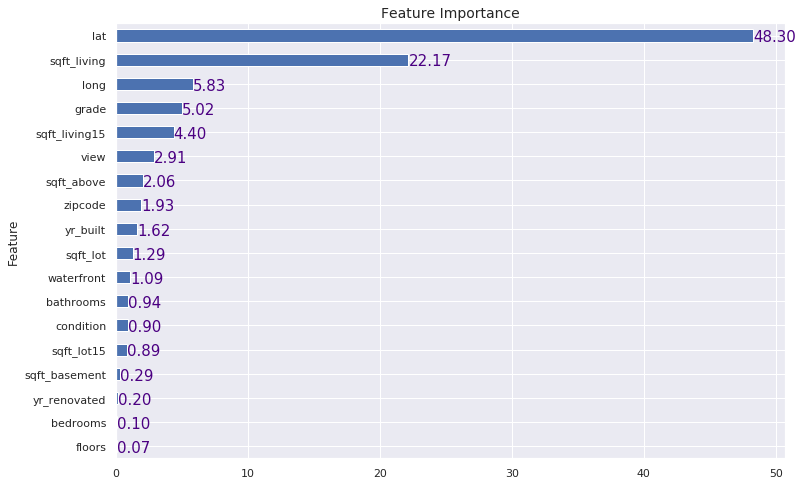

In [291]:
def plot_feature_imp_catboost(model_catboost,features):
    """Plot the feature importance horizontal bar plot.
    
    """

    df_imp = pd.DataFrame({'Feature': model.feature_names_,
                        'Importance': model.feature_importances_
                        }) 

    df_imp = df_imp.sort_values('Importance').set_index('Feature')
    ax = df_imp.plot.barh(figsize=(12,8))

    plt.grid(True)
    plt.title('Feature Importance',fontsize=14)
    ax.get_legend().remove()

    for p in ax.patches:
        x = p.get_width()
        y = p.get_y()
        text = '{:.2f}'.format(p.get_width())
        ax.text(x, y,text,fontsize=15,color='indigo')

    plt.show()

plot_feature_imp_catboost(model, features_raw_all)

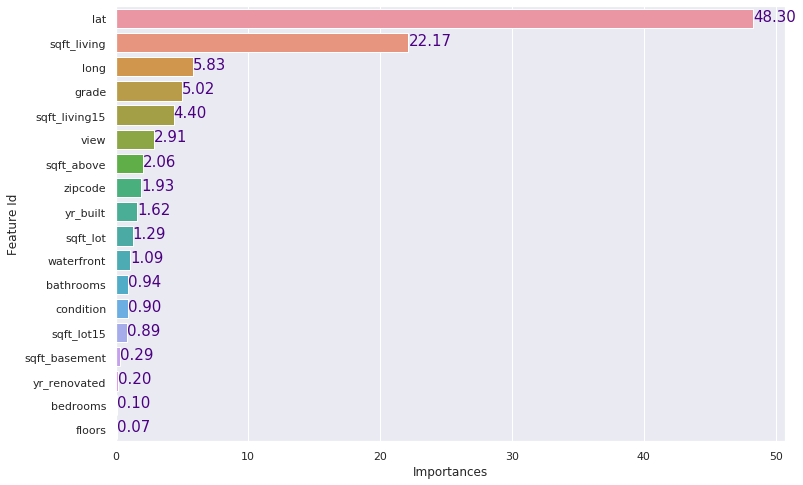

In [292]:
df_fimp = model.get_feature_importance(prettified=True)

plt.figure(figsize=(12,8))
ax = sns.barplot(x="Importances", y="Feature Id", data=df_fimp);

for p in ax.patches:
    x = p.get_width()
    y = p.get_y()
    text = '{:.2f}'.format(p.get_width())
    ax.text(x, y,text,fontsize=15,color='indigo',va='top',ha='left')

# Tree Plot

- [catboost tutorials model analysis](https://github.com/catboost/tutorials/tree/master/model_analysis)

In [293]:
show_method_attributes(model)

Object Type: <class 'catboost.core.CatBoostRegressor'>



0                     1                        2  \
0          best_iteration_  drop_unused_features       get_best_iteration   
1              best_score_          eval_metrics           get_best_score   
2  calc_feature_statistics         evals_result_              get_borders   
3        calc_leaf_indexes  feature_importances_  get_cat_feature_indices   
4                 classes_        feature_names_         get_evals_result   
5                  compare                   fit   get_feature_importance   
6                     copy        get_all_params          get_leaf_values   
7     create_metric_calcer                                                  

                       3                         4                  5  \
0       get_leaf_weights  get_text_feature_indices   plot_predictions   
1           get_metadata      get_tree_leaf_counts          plot_tree   
2  get_object_importance               grid_search            predict   
3              get_param                 is_fitted       random_seed_   
4             get_params      iterate_leaf_indexes  randomized_search   
5          get_test_eval            learning_rate_       save_borders   
6         get_test_evals                load_model         save_model   
7                                                                       

                   6  
0              score  
1  set_feature_names  
2    set_leaf_values  
3         set_params  
4             shrink  
5     staged_predict  
6        tree_count_  
7

In [0]:
# model.plot_tree(4)
# WARNING: This crashes the google colab, do not use it (Nov 23, 2019)

In [0]:
# this takes long time maybe 1 or 2 hours, I did not waited,
# but did not crash until about 10 minutes.

# Xtr = Xtrain
# Xtx = Xtest
# ytr,ytx = ytrain, ytest

# pool = Pool(Xtr, ytr, cat_features=[], feature_names=features_raw_all)

# model = CatBoostClassifier(
#     max_depth=2, verbose=False, max_ctr_complexity=1, iterations=2).fit(pool)

# model.plot_tree(
#     tree_idx=0,
#     pool=pool
# )


# Metric Visualizer
- [metric visualizer](https://catboost.ai/docs/concepts/python-reference_catboostipythonwidget.html)

```python
import catboost
from catboost import CatBoostClassifier

# part 1: fit the model
cat_features = [0,1,2]

train_data = [["a", "b", 1, 4, 5, 6],
              ["a", "b", 4, 5, 6, 7],
              ["c", "d", 30, 40, 50, 60]]

train_labels = [1,1,0]

model = CatBoostClassifier(iterations=20, 
                           loss_function = "CrossEntropy", 
                           train_dir = "crossentropy")

model.fit(train_data, train_labels, cat_features)
predictions = model.predict(train_data)


# part 2: visualize
w = catboost.MetricVisualizer('/crossentropy/')
w.start()
```

Part 1 works in google colab and gives some files in the directory crossentroy but part2 keeps running for infinite time.



# catboost using Pool

- [object_importance_tutorial](https://github.com/catboost/tutorials/blob/master/model_analysis/object_importance_tutorial.ipynb)

In [0]:
from catboost import CatBoost, Pool

In [296]:
df_Xtrain.head(2)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393

In [0]:
cat_features = [] # take it empty for the moment
dtrain = Pool(Xtrain, ytrain, cat_features=cat_features)
dvalid = Pool(Xvalid, yvalid, cat_features=cat_features)
dtest = Pool(Xtest, ytest, cat_features=cat_features)

In [298]:
params = {'iterations': 100, 'verbose': False, 'random_seed': 0}
bst_cat = CatBoost(params=params)
bst_cat.fit(dtrain);
print(bst_cat.eval_metrics(dvalid, ['RMSE'])['RMSE'][-1])

0.20448184235714145


In [0]:
# show_method_attributes(bst_cat)

In [300]:
ypreds = bst_cat.predict(dtest)

# r-squared values
r2 = sklearn.metrics.r2_score(ytest, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print('Adusted R-squared value ', ar2)

Adusted R-squared value  0.8480145818183455


In [0]:
# bst_cat.plot_tree(tree_idx=0) # !!! Crashes Google Colab!!!

## Cross Validation
- [Catboost CV](https://catboost.ai/docs/concepts/python-usages-examples.html)
- [Catboost Jupyter Notebook visulization](https://catboost.ai/docs/features/visualization_jupyter-notebook.html)

```python
cv(pool=None, params=None, dtrain=None, iterations=None, 
num_boost_round=None, fold_count=None, nfold=None, inverted=False,
partition_random_seed=0, seed=None, shuffle=True, logging_level=None,
stratified=None, as_pandas=True, metric_period=None, verbose=None,
verbose_eval=None, plot=False, early_stopping_rounds=None,
save_snapshot=None, snapshot_file=None,
snapshot_interval=None, folds=None, type='Classical')
```

In [0]:
# help(catboost.cv)

In [303]:
params = {'iterations': 100, 'verbose': False, 'random_seed': 0}

df_scores = catboost.cv(dtrain,
            params,
            fold_count=2,
            verbose=100,
            plot="True") # plot does not work in google colab

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 12.6649445	test: 12.6650182	best: 12.6650182 (0)	total: 57.9ms	remaining: 5.74s
99:	learn: 0.7055708	test: 0.7169178	best: 0.7169178 (99)	total: 4.71s	remaining: 0us


In [304]:
print(df_scores.columns)
df_scores.head()

Index(['iterations', 'test-RMSE-mean', 'test-RMSE-std', 'train-RMSE-mean',
       'train-RMSE-std'],
      dtype='object')


iterations  test-RMSE-mean  test-RMSE-std  train-RMSE-mean  train-RMSE-std
0           0       12.665018       0.009988        12.664945        0.009306
1           1       12.286175       0.010208        12.286096        0.009024
2           2       11.924383       0.009950        11.923869        0.008671
3           3       11.573240       0.010092        11.572335        0.008365
4           4       11.230261       0.010027        11.229196        0.008049

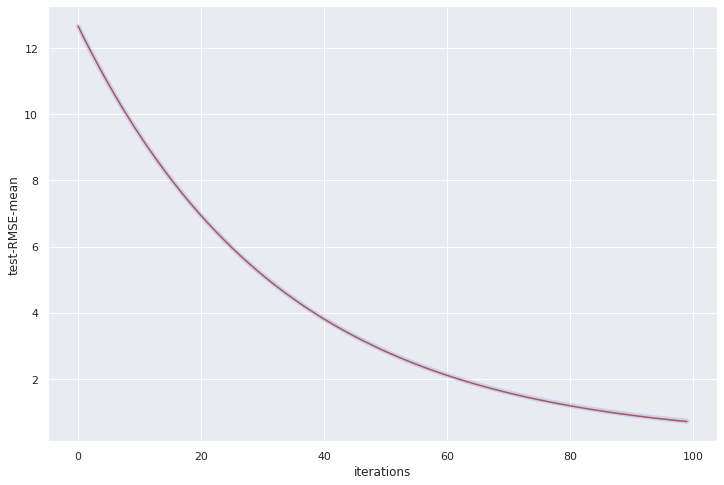

In [305]:
fig, ax = plt.subplots(1,1,figsize=(12,8))
sns.lineplot(x='iterations',y='train-RMSE-mean',data=df_scores,ax=ax,color='r')
sns.lineplot(x='iterations',y='test-RMSE-mean',data=df_scores,ax=ax,color='b',alpha=0.2,linewidth=5,linestyle='--')

# Model Evaluation Using shap
- [official shap github repo](https://github.com/slundberg/shap)
- [catboost tutorials model analysis shap values tutorial](https://github.com/catboost/tutorials/blob/master/model_analysis/shap_values_tutorial.ipynb)
- [Kaggle: Machine Learning Interpretability](https://www.kaggle.com/datacog314/tutorial-machine-learning-interpretability/comments)

In [0]:
import shap

In [307]:
# fit the model
model = CatBoostRegressor(verbose=1000,random_state=0)
model.fit(df_Xtrain, ytr)

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(df_Xtest)

0:	learn: 0.5150549	total: 6.48ms	remaining: 6.47s
999:	learn: 0.1435613	total: 5.49s	remaining: 0us


In [308]:
shap_values.shape, df_Xtest.shape, df_Xtrain.shape

((4323, 18), (4323, 18), (13832, 18))

In [310]:
df_Xtest.head(1)

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0         3        2.5     7.798933  8.544225     2.0           0     0   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          3      7      2437.0            0.0    2011.0           0.0   

   zipcode      lat    long  sqft_living15  sqft_lot15  
0    98002  47.3517 -122.21       7.798933    8.437067

In [311]:
df_Xtest.head(1)[['yr_built','sqft_living','lat','grade']]

yr_built  sqft_living      lat  grade
0    2011.0     7.798933  47.3517      7

In [312]:
# load JS visualization code to notebook
shap.initjs()

# Look only first row of test data
# use matplotlib=True to avoid Javascript
shap.force_plot(explainer.expected_value,
                shap_values[0,:],
                df_Xtest.iloc[0,:],
                matplotlib=False,
                text_rotation=90)

In [0]:
# the prediction for first row is 12.66 which is due to alll columns.
#
# red features contribute positive, blue features contribute negative.
# here, first row has sqft_living = 7.799, which is a good value it makes prediction higher 
# but, lat = 47.34 makes the label prediction lower

In [314]:
# load JS visualization code to notebook
shap.initjs()

# visualize the test set predictions
shap.force_plot(explainer.expected_value, shap_values, df_Xtest,matplotlib=False)

/usr/local/lib/python3.6/dist-packages/shap/plots/force.py:145: UserWarning:

shap.force_plot is slow for many thousands of rows, try subsampling your data.



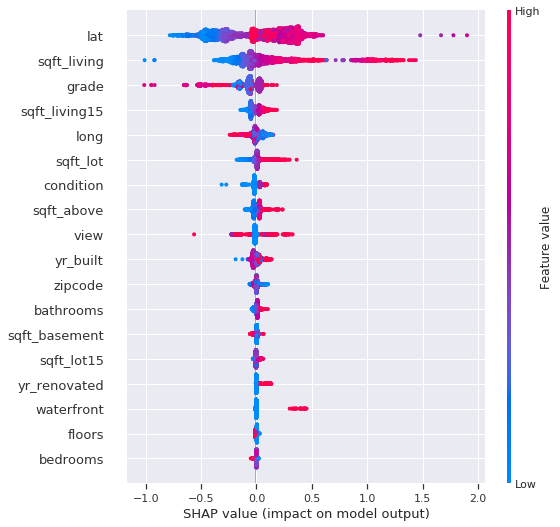

In [315]:
shap.summary_plot(shap_values, df_Xtest)

This plot is made of many dots. Each dot has three characteristics:

- Vertical location shows what feature it is depicting
- Color shows whether that feature was high or low for that row of the dataset
- Horizontal location shows whether the effect of that value caused a higher or lower prediction.

For example, the point in the upper right was for a team that has high latitude, increasing the prediction by 2.0.

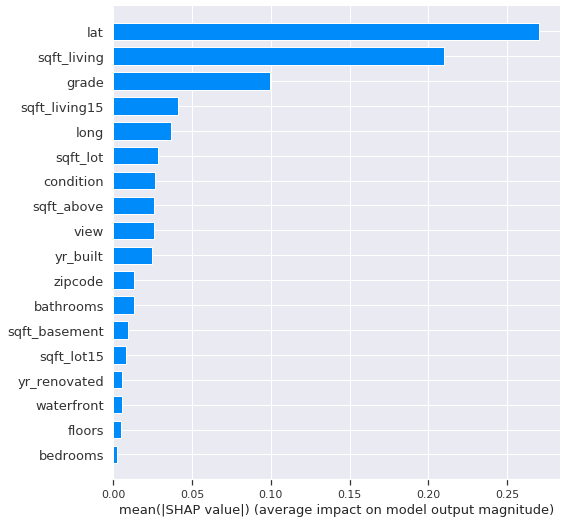

In [316]:
shap.summary_plot(shap_values, df_Xtest, plot_type='bar')

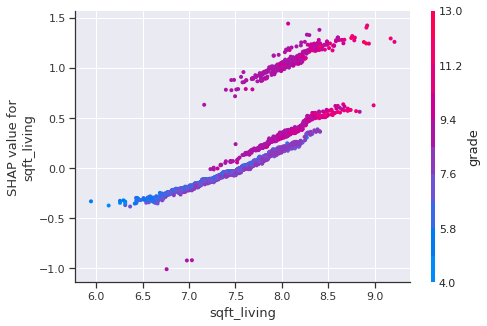

In [317]:
shap.dependence_plot("sqft_living", shap_values, df_Xtest)

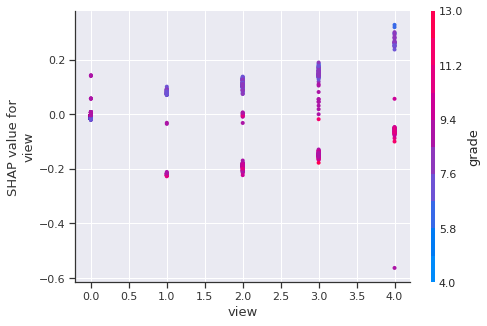

In [318]:
shap.dependence_plot("view", shap_values, df_Xtest)

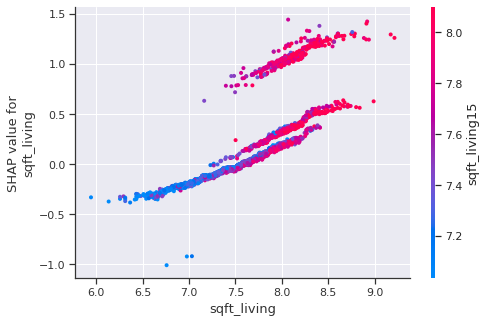

In [319]:
shap.dependence_plot(ind='sqft_living', interaction_index='sqft_living15',
                     shap_values=shap_values, 
                     features=df_Xtest,  
                     display_features=df_Xtest)

# HPO (Hyper Parameter Optimization)

We generally should optimize model complexity and then tune the convergence.

model complexity: max_depth etc  
convergence: learning rate  

Parameters:
- learning_rate: step size shrinkage used to prevent overfitting. Range is [0,1]
- depth: determines how deeply each tree is allowed to grow during any boosting round.
- subsample: percentage of samples used per tree. Low value can lead to underfitting.
- colsample_bytree: percentage of features used per tree. High value can lead to overfitting.


### Baseline model

In [0]:
Xtr = scaler.transform(Xtrain)
Xtx = scaler.transform(Xtest)

ytr,ytx = ytrain, ytest

In [324]:
# fit the model
model_cat = CatBoostRegressor(verbose=1000,random_state=0)

model_cat.fit(Xtr, ytr)

# fitted model
model = model_cat


# ypreds
kf=KFold(n_splits=5,shuffle=True,random_state=SEED)
ypreds = cross_val_predict(model, Xtx, ytx, cv=kf)

# r-squared values
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print('Adjusted R-squared value for test', ar2)

0:	learn: 0.5150549	total: 6.74ms	remaining: 6.73s
999:	learn: 0.1435613	total: 5.42s	remaining: 0us
0:	learn: 0.5116228	total: 3.58ms	remaining: 3.58s
999:	learn: 0.1127392	total: 3.22s	remaining: 0us
0:	learn: 0.5177498	total: 3.59ms	remaining: 3.58s
999:	learn: 0.1147289	total: 3.19s	remaining: 0us
0:	learn: 0.5269744	total: 3.72ms	remaining: 3.71s
999:	learn: 0.1178217	total: 3.2s	remaining: 0us
0:	learn: 0.5195829	total: 3.48ms	remaining: 3.48s
999:	learn: 0.1160045	total: 3.23s	remaining: 0us
0:	learn: 0.5180937	total: 3.51ms	remaining: 3.5s
999:	learn: 0.1166601	total: 3.2s	remaining: 0us
Adjusted R-squared value for test 0.9005839751575635


In [0]:
# show_method_attributes(model)
# model.get_all_params()

In [326]:
"""
First check some iterations:
1000 = 0.9091745470144424 # default iterations = 1000
2000 = 0.9121352344981736
3000 = 0.9126262506236912
4000 = 0.9123204650792888
"""
time_start = time.time()


model = CatBoostRegressor(verbose=False,random_state=0,iterations=3_000)
model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

time_taken = time.time() - time_start
print('Time taken: {:.0f} min {:.0f} secs'.format(*divmod(time_taken,60)))

print('Adjusted R-squared value for test', ar2)

Time taken: 0 min 17 secs
Adjusted R-squared value for test 0.9126262506236912


# HPO Model Complexity

In [327]:
for n in [7]: # default detpth = 6

    model = CatBoostRegressor(verbose=False,random_state=0,
                              iterations=3_000,
                              depth=n,
                              )
    model.fit(Xtr, ytr)
    ypreds = model.predict(Xtx)
    r2 = sklearn.metrics.r2_score(ytx, ypreds)
    ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

    print( round(n,6), round(ar2,6))

"""
2 0.900063
3 0.908837
4 0.911563
5 0.912822
6 0.912626
7 0.912898 **best
8 0.911368
9 0.909902
10 0.907586
""";

7 0.912898


## HPO Model Regularization

In [328]:
for n in [3]: # default l2_leaf_reg = 3

    model = CatBoostRegressor(verbose=False,random_state=0,
                              iterations=3_000,
                              depth=7,
                              l2_leaf_reg=n,
                              )
    model.fit(Xtr, ytr)
    ypreds = model.predict(Xtx)
    r2 = sklearn.metrics.r2_score(ytx, ypreds)
    ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

    print( round(n,6), round(ar2,6))

"""

1 0.912553
2 0.912031
3 0.912898 ** best
4 0.912124
5 0.912581
6 0.912447
7 0.912124
8 0.912724
9 0.912262
""";

3 0.912898


In [329]:
model = CatBoostRegressor(verbose=False,random_state=0,
                            iterations=3_000,
                            depth=7,
                            )

# do not fit the model here
# let the grid search fit itself.

grid = {'learning_rate': [0.03, 0.1], # 0.02999999933
        'subsample': [0.8, 0.7, 0.6,0.85,0.9,1], # default 0.8

        }

dict_grid_search_result = model.grid_search(grid,
                                       X=Xtr, 
                                       y=ytr, 
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	loss: 0.1860699	best: 0.1860699 (0)	total: 21.1s	remaining: 3m 51s
1:	loss: 0.2138883	best: 0.1860699 (0)	total: 42s	remaining: 3m 30s
2:	loss: 0.1860555	best: 0.1860555 (2)	total: 1m 2s	remaining: 3m 6s
3:	loss: 0.2127064	best: 0.1860555 (2)	total: 1m 22s	remaining: 2m 45s
4:	loss: 0.1867880	best: 0.1860555 (2)	total: 1m 42s	remaining: 2m 23s
5:	loss: 0.2117339	best: 0.1860555 (2)	total: 2m 2s	remaining: 2m 2s
6:	loss: 0.1871934	best: 0.1860555 (2)	total: 2m 23s	remaining: 1m 42s
7:	loss: 0.2125742	best: 0.1860555 (2)	total: 2m 44s	remaining: 1m 22s
8:	loss: 0.1863716	best: 0.1860555 (2)	total: 3m 5s	remaining: 1m 1s
9:	loss: 0.2153388	best: 0.1860555 (2)	total: 3m 27s	remaining: 41.4s
10:	loss: 0.1778722	best: 0.1778722 (10)	total: 3m 48s	remaining: 20.7s
11:	loss: 0.1871837	best: 0.1778722 (10)	total: 4m 9s	remaining: 0us
Estimating final quality...


In [330]:
dict_grid_search_result.keys()

dict_keys(['params', 'cv_results'])

In [331]:
dict_grid_search_result['params']

{'learning_rate': 0.03, 'subsample': 1}

In [332]:
dict_cv_results = dict_grid_search_result['cv_results']

dict_cv_results.keys()

dict_keys(['iterations', 'test-RMSE-mean', 'test-RMSE-std', 'train-RMSE-mean', 'train-RMSE-std'])

In [333]:
df_grid_search_cv = pd.DataFrame(dict_cv_results)

df_grid_search_cv.head()

iterations  test-RMSE-mean  test-RMSE-std  train-RMSE-mean  train-RMSE-std
0           0       12.666026       0.007133        12.665871        0.003548
1           1       12.288965       0.007672        12.288813        0.003236
2           2       11.924768       0.007758        11.924433        0.003151
3           3       11.571655       0.008045        11.571022        0.003094
4           4       11.232295       0.008737        11.231073        0.003860

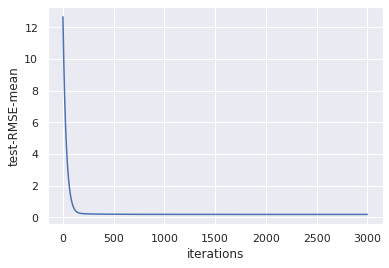

In [334]:
sns.lineplot(x='iterations',y='test-RMSE-mean', data=df_grid_search_cv)

In [335]:
model = CatBoostRegressor(verbose=False,random_state=0,
                            iterations=3_000,
                            depth=7,
                            l2_leaf_reg=3,
                            learning_rate= 0.03,
                            subsample= 1, # grid search subsamples gave me lower result
                            )
model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0.912586


In [336]:
model = CatBoostRegressor(verbose=False,random_state=0,
                            iterations=3_000,
                            depth=7,
                            l2_leaf_reg=3,
                            learning_rate= 0.03,
                            subsample= 0.8, # default
                            )
model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0.912898


## Using Early Stopping from Validation Set

In [337]:
df_Xtrain.head(2)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393

In [338]:
df_Xtrain.head(2)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393

In [339]:
params = dict(verbose=500,
              random_state=0,
              iterations=3_000,
              depth=7,
              l2_leaf_reg=3,
              learning_rate= 0.03,
              subsample= 0.8,
              eval_metric='RMSE',
              cat_features = ['bedrooms','view','condition',],
              early_stopping_rounds=200,
            )


model = catboost.CatBoostRegressor(**params)

model.fit(df_Xtrain, ytrain, 
          eval_set=(df_Xvalid, yvalid), 
          use_best_model=True, 
          plot=False
         );

0:	learn: 0.5148739	test: 0.5148767	best: 0.5148767 (0)	total: 26.9ms	remaining: 1m 20s
500:	learn: 0.1532113	test: 0.1653789	best: 0.1653789 (500)	total: 10s	remaining: 50s
1000:	learn: 0.1380923	test: 0.1614028	best: 0.1614014 (999)	total: 20s	remaining: 39.9s
1500:	learn: 0.1281533	test: 0.1600823	best: 0.1600823 (1500)	total: 30.1s	remaining: 30s
2000:	learn: 0.1202758	test: 0.1590871	best: 0.1590869 (1990)	total: 40.2s	remaining: 20.1s
2500:	learn: 0.1140351	test: 0.1586791	best: 0.1586791 (2500)	total: 50.3s	remaining: 10s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.1586727222
bestIteration = 2502

Shrink model to first 2503 iterations.


In [0]:
# show_method_attributes(model)

In [341]:
model.get_params()

{'cat_features': ['bedrooms', 'view', 'condition'],
 'depth': 7,
 'early_stopping_rounds': 200,
 'eval_metric': 'RMSE',
 'iterations': 3000,
 'l2_leaf_reg': 3,
 'learning_rate': 0.03,
 'loss_function': 'RMSE',
 'random_state': 0,
 'subsample': 0.8,
 'verbose': 500}

In [342]:
params = model.get_params()
params['iterations'] = 2503
params['cat_features'] = []

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0:	learn: 0.5150564	total: 9.06ms	remaining: 22.7s
500:	learn: 0.1526201	total: 3.85s	remaining: 15.4s
1000:	learn: 0.1369104	total: 7.65s	remaining: 11.5s
1500:	learn: 0.1262763	total: 11.5s	remaining: 7.64s
2000:	learn: 0.1178654	total: 15.3s	remaining: 3.85s
2500:	learn: 0.1106658	total: 19.1s	remaining: 15.3ms
2502:	learn: 0.1106367	total: 19.1s	remaining: 0us
0.912973


## Use Categorical Features

In [343]:
df_Xtrain.head(2)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393

In [344]:
"""
all categories except float bathrooms and floors = 0.913583

"""

Xtr = df_Xtrain
Xtx = df_Xtest

params ={'depth': 7,
 'early_stopping_rounds': 200,
 'eval_metric': 'RMSE',
 'iterations': 3000,
 'l2_leaf_reg': 3,
 'learning_rate': 0.03,
 'loss_function': 'RMSE',
 'random_state': 0,
 'subsample': 0.8,
 'verbose': 500}

params['iterations'] = 2503

lst_cat_features = ['bedrooms','waterfront','view','condition','grade','zipcode']
params['cat_features'] = lst_cat_features

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0:	learn: 0.5152129	total: 33.2ms	remaining: 1m 23s
500:	learn: 0.1554250	total: 12.2s	remaining: 48.7s
1000:	learn: 0.1399049	total: 24.4s	remaining: 36.7s
1500:	learn: 0.1295130	total: 36.9s	remaining: 24.6s
2000:	learn: 0.1217662	total: 49.3s	remaining: 12.4s
2500:	learn: 0.1153580	total: 1m 2s	remaining: 49.6ms
2502:	learn: 0.1153197	total: 1m 2s	remaining: 0us
0.913583


## Log and Scaling non categorical features

In [345]:
non_cat_features = df_Xtrain.columns.drop(lst_cat_features)
non_cat_features

Index(['bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [0]:
cols_log = [ 'sqft_living', 'sqft_lot', 'floors', 'sqft_above',
       'sqft_basement',
       'sqft_living15', 'sqft_lot15']

In [0]:
df_Xtrain_log = df_Xtrain.copy()
df_Xtest_log = df_Xtest.copy()
df_Xvalid_log = df_Xvalid.copy()

In [348]:
df_Xtrain.isnull().sum().sum(), df_Xtest.isnull().sum().sum(), df_Xvalid.isnull().sum().sum()

(0, 0, 0)

In [0]:
for c in cols_log:
    df_Xtrain_log[c] = df_Xtrain_log[c].to_numpy().astype(float)
    df_Xtest_log[c] = df_Xtest_log[c].to_numpy().astype(float)
    df_Xvalid_log[c] = df_Xvalid_log[c].to_numpy().astype(float)

    df_Xtrain_log[c] = np.log1p(df_Xtrain_log[c].to_numpy())
    df_Xtest_log[c] = np.log1p(df_Xtest_log[c].to_numpy())
    df_Xvalid_log[c] = np.log1p(df_Xvalid_log[c].to_numpy())

In [350]:
Xtr = df_Xtrain_log
Xtx = df_Xtest_log

params = {'depth': 7,
        'early_stopping_rounds': 200,
        'eval_metric': 'RMSE',
        'iterations': 2503,
        'l2_leaf_reg': 3,
        'learning_rate': 0.03,
        'loss_function': 'RMSE',
        'random_state': 0,
        'subsample': 0.8,
        'verbose': 500
}

lst_cat_features = ['bedrooms','waterfront','view','condition','grade','zipcode']
params['cat_features'] = lst_cat_features

"""
all categories except float bathrooms and floors = 0.913582
log transform few features                       = 0.913582

"""

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0:	learn: 0.5152129	total: 27.6ms	remaining: 1m 9s
500:	learn: 0.1554250	total: 12s	remaining: 47.8s
1000:	learn: 0.1399049	total: 24.2s	remaining: 36.3s
1500:	learn: 0.1295130	total: 36.5s	remaining: 24.4s
2000:	learn: 0.1217662	total: 49.1s	remaining: 12.3s
2500:	learn: 0.1153580	total: 1m 1s	remaining: 49.4ms
2502:	learn: 0.1153197	total: 1m 1s	remaining: 0us
0.913582


In [0]:
for c in cols_log:
    df_Xtrain_log[c] = (df_Xtrain_log[c] - df_Xtrain_log[c].mean()) / df_Xtrain_log[c].std()
    df_Xtest_log[c] = (df_Xtest_log[c] - df_Xtest_log[c].mean()) / df_Xtest_log[c].std()


In [352]:
"""
all categories except float bathrooms and floors = 0.913583
log transform few features                       = 0.90657
log transform few features + normalize           = 0.913443

For tree based model, log+scaling did not help at all. Instead reduced acc.
"""



Xtr = df_Xtrain_log
Xtx = df_Xtest_log

params = {'depth': 7,
        'early_stopping_rounds': 200,
        'eval_metric': 'RMSE',
        'iterations': 2503,
        'l2_leaf_reg': 3,
        'learning_rate': 0.03,
        'loss_function': 'RMSE',
        'random_state': 0,
        'subsample': 0.8,
        'verbose': 500
}

lst_cat_features = ['bedrooms','waterfront','view','condition','grade','zipcode']
params['cat_features'] = lst_cat_features

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0:	learn: 0.5152129	total: 27.6ms	remaining: 1m 9s
500:	learn: 0.1554250	total: 11.8s	remaining: 47.3s
1000:	learn: 0.1399049	total: 23.5s	remaining: 35.2s
1500:	learn: 0.1295130	total: 35.5s	remaining: 23.7s
2000:	learn: 0.1217662	total: 47.5s	remaining: 11.9s
2500:	learn: 0.1153580	total: 59.6s	remaining: 47.7ms
2502:	learn: 0.1153197	total: 59.7s	remaining: 0us
0.913443


## Adding Polynomial Features

In [353]:
from sklearn.preprocessing import PolynomialFeatures

polyfeat = PolynomialFeatures(degree=2, interaction_only=True)

Xtrain_poly = polyfeat.fit_transform(df_Xtrain)
Xtest_poly = polyfeat.fit_transform(df_Xtest)

Xtrain.shape, Xtest.shape, Xtrain_poly.shape, Xtest_poly.shape

((13832, 18), (4323, 18), (13832, 172), (4323, 172))

In [354]:
lst_names = polyfeat.get_feature_names()
lst_names

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x7',
 'x8',
 'x9',
 'x10',
 'x11',
 'x12',
 'x13',
 'x14',
 'x15',
 'x16',
 'x17',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x0 x7',
 'x0 x8',
 'x0 x9',
 'x0 x10',
 'x0 x11',
 'x0 x12',
 'x0 x13',
 'x0 x14',
 'x0 x15',
 'x0 x16',
 'x0 x17',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x1 x7',
 'x1 x8',
 'x1 x9',
 'x1 x10',
 'x1 x11',
 'x1 x12',
 'x1 x13',
 'x1 x14',
 'x1 x15',
 'x1 x16',
 'x1 x17',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x2 x7',
 'x2 x8',
 'x2 x9',
 'x2 x10',
 'x2 x11',
 'x2 x12',
 'x2 x13',
 'x2 x14',
 'x2 x15',
 'x2 x16',
 'x2 x17',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x3 x7',
 'x3 x8',
 'x3 x9',
 'x3 x10',
 'x3 x11',
 'x3 x12',
 'x3 x13',
 'x3 x14',
 'x3 x15',
 'x3 x16',
 'x3 x17',
 'x4 x5',
 'x4 x6',
 'x4 x7',
 'x4 x8',
 'x4 x9',
 'x4 x10',
 'x4 x11',
 'x4 x12',
 'x4 x13',
 'x4 x14',
 'x4 x15',
 'x4 x16',
 'x4 x17',
 'x5 x6',
 'x5 x7',
 'x5 x8',
 'x5 x9',
 'x5 x10',
 'x5 x11',
 'x5 x12',
 'x5 x13',
 'x5 x14',
 'x5 x15',
 'x5 x16',
 'x5 x17',
 'x6 x7',
 'x6 x8',
 'x6 x9',
 'x6 x10',
 'x6 x11',
 'x6 x12',
 'x6 x13',
 'x6 x14',
 'x6 x15',
 'x6 x16',
 'x6 x17',
 'x7 x8',
 'x7 x9',
 'x7 x10',
 'x7 x11',
 'x7 x12',
 'x7 x13',
 'x7 x14',
 'x7 x15',
 'x7 x16',
 'x7 x17',
 'x8 x9',
 'x8 x10',
 'x8 x11',
 'x8 x12',
 'x8 x13',
 'x8 x14',
 'x8 x15',
 'x8 x16',
 'x8 x17',
 'x9 x10',
 'x9 x11',
 'x9 x12',
 'x9 x13',
 'x9 x14',
 'x9 x15',
 'x9 x16',
 'x9 x17',
 'x10 x11',
 'x10 x12',
 'x10 x13',
 'x10 x14',
 'x10 x15',
 'x10 x16',
 'x10 x17',
 'x11 x12',
 'x11 x13',
 'x11 x14',
 'x11 x15',
 'x11 x16',
 'x11 x17',
 'x12 x13',
 'x12 x14',
 'x12 x15',
 'x12 x16',
 'x12 x17',
 'x13 x14',
 'x13 x15',
 'x13 x16',
 'x13 x17',
 'x14 x15',
 'x14 x16',
 'x14 x17',
 'x15 x16',
 'x15 x17',
 'x16 x17']

In [355]:
pd.DataFrame(Xtrain_poly[:5,:])

0    1     2         3          4    5    6    7    8    9      10  \
0  1.0  5.0  3.00  8.243019  10.652944  1.5  0.0  0.0  4.0  9.0  3800.0   
1  1.0  3.0  2.50  7.890208   8.517393  2.0  0.0  3.0  5.0  9.0  2000.0   
2  1.0  2.0  1.00  7.359468   8.456381  1.5  0.0  1.0  3.0  8.0  1570.0   
3  1.0  1.0  0.75  6.381816   8.639588  1.0  0.0  0.0  3.0  6.0   590.0   
4  1.0  3.0  1.00  7.123673   8.294300  1.5  0.0  0.0  3.0  8.0  1240.0   

      11      12      13       14       15       16        17         18  \
0    0.0  1984.0     0.0  98042.0  47.3488 -122.095  7.855932  10.485033   
1  670.0  1942.0  1995.0  98144.0  47.5855 -122.292  7.749753   8.517393   
2    0.0  1931.0     0.0  98136.0  47.5256 -122.392  7.507141   8.456381   
3    0.0  1944.0     0.0  98118.0  47.5181 -122.267  6.888572   8.639588   
4    0.0  1928.0  2000.0  98106.0  47.5467 -122.359  7.090910   9.781772   

      19         20         21   22   23   24    25    26       27      28  \
0  15.00  41.215097  53.264721  7.5  0.0  0.0  20.0  45.0  19000.0     0.0   
1   7.50  23.670625  25.552180  6.0  0.0  9.0  15.0  27.0   6000.0  2010.0   
2   2.00  14.718935  16.912762  3.0  0.0  2.0   6.0  16.0   3140.0     0.0   
3   0.75   6.381816   8.639588  1.0  0.0  0.0   3.0   6.0    590.0     0.0   
4   3.00  21.371018  24.882899  4.5  0.0  0.0   9.0  24.0   3720.0     0.0   

       29      30        31        32       33         34         35  \
0  9920.0     0.0  490210.0  236.7440 -610.475  39.279661  52.425163   
1  5826.0  5985.0  294432.0  142.7565 -366.876  23.249260  25.552180   
2  3862.0     0.0  196272.0   95.0512 -244.784  15.014282  16.912762   
3  1944.0     0.0   98118.0   47.5181 -122.267   6.888572   8.639588   
4  5784.0  6000.0  294318.0  142.6401 -367.077  21.272729  29.345315   

          36         37    38   39   40     41    42       43      44      45  \
0  24.729058  31.958833  4.50  0.0  0.0  12.00  27.0  11400.0     0.0  5952.0   
1  19.725521  21.293483  5.00  0.0  7.5  12.50  22.5   5000.0  1675.0  4855.0   
2   7.359468   8.456381  1.50  0.0  1.0   3.00   8.0   1570.0     0.0  1931.0   
3   4.786362   6.479691  0.75  0.0  0.0   2.25   4.5    442.5     0.0  1458.0   
4   7.123673   8.294300  1.50  0.0  0.0   3.00   8.0   1240.0     0.0  1928.0   

       46        47          48         49         50         51         52  \
0     0.0  294126.0  142.046400 -366.28500  23.567797  31.455098  87.812426   
1  4987.5  245360.0  118.963750 -305.73000  19.374384  21.293483  67.204006   
2     0.0   98136.0   47.525600 -122.39200   7.507141   8.456381  62.234463   
3     0.0   73588.5   35.638575  -91.70025   5.166429   6.479691  55.136260   
4  2000.0   98106.0   47.546700 -122.35900   7.090910   9.781772  59.085876   

          53   54         55         56         57            58           59  \
0  12.364529  0.0   0.000000  32.972078  74.187175  31323.473982     0.000000   
1  15.780416  0.0  23.670625  39.451041  71.011874  15780.416426  5286.439503   
2  11.039201  0.0   7.359468  22.078403  58.875741  11554.364192     0.000000   
3   6.381816  0.0   0.000000  19.145448  38.290896   3765.271450     0.000000   
4  10.685509  0.0   0.000000  21.371018  56.989382   8833.354254     0.000000   

             60            61             62          63           64  \
0  16354.150626      0.000000  808162.114779  390.297080 -1006.431462   
1  15322.784350  15740.965385  774376.594867  375.459503  -964.909343   
2  14211.132009      0.000000  722228.716148  349.763115  -900.739963   
3  12406.250338      0.000000  626171.023996  303.251772  -780.285499   
4  13734.441130  14247.345570  698875.042265  338.707133  -871.645478   

          65         66         67   68         69         70         71  \
0  64.756602  86.428327  15.979416  0.0   0.000000  42.611777  95.876498   
1  61.147168  67.204006  17.034786  0.0  25.552180  42.586966  76.656539   
2  55.248562  62.234463  12.684572  0.0   8.456381  25.369143  67.651048   
3  

In [356]:
df_Xtrain.head(2)

bedrooms  bathrooms  sqft_living   sqft_lot  floors  waterfront  view  \
0         5        3.0     8.243019  10.652944     1.5           0     0   
1         3        2.5     7.890208   8.517393     2.0           0     3   

   condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0          4      9      3800.0            0.0    1984.0           0.0   
1          5      9      2000.0          670.0    1942.0        1995.0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98042  47.3488 -122.095       7.855932   10.485033  
1    98144  47.5855 -122.292       7.749753    8.517393

In [357]:
"""
deg 2                   = 0.90771
deg 2, interaction only = 0.90655

"""

Xtr = Xtrain_poly
Xtx = Xtest_poly

params = {'depth': 7,
        'early_stopping_rounds': 200,
        'eval_metric': 'RMSE',
        'l2_leaf_reg': 3,
        'learning_rate': 0.03,
        'loss_function': 'RMSE',
        'random_state': 0,
        'subsample': 0.8,
        'verbose': 500,
        'iterations': 2503
}

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( round(ar2,6))

0:	learn: 0.5149582	total: 199ms	remaining: 8m 17s
500:	learn: 0.1507958	total: 36.9s	remaining: 2m 27s
1000:	learn: 0.1324478	total: 1m 13s	remaining: 1m 50s
1500:	learn: 0.1199529	total: 1m 50s	remaining: 1m 13s
2000:	learn: 0.1104859	total: 2m 27s	remaining: 36.9s
2500:	learn: 0.1026502	total: 3m 4s	remaining: 147ms
2502:	learn: 0.1026096	total: 3m 4s	remaining: 0us
0.90655


# Try Your luck with different random states

In [358]:
for n in [0, 42, 100, 314, 31416, 123, 12345, 111]:

    Xtr = df_Xtrain
    Xtx = df_Xtest

    params ={'depth': 7,
    'early_stopping_rounds': 200,
    'eval_metric': 'RMSE',
    'iterations':2503,
    'l2_leaf_reg': 3,
    'learning_rate': 0.03,
    'loss_function': 'RMSE',
    'random_state': n,
    'subsample': 0.8,
    'verbose': False}

    lst_cat_features = ['bedrooms','waterfront','view','condition','grade','zipcode']
    params['cat_features'] = lst_cat_features

    model = catboost.CatBoostRegressor(**params)

    model.fit(Xtr, ytr)
    ypreds = model.predict(Xtx)
    r2 = sklearn.metrics.r2_score(ytx, ypreds)
    ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

    print( n, round(ar2,6))

0 0.913583
42 0.914044
100 0.913815
314 0.913981
31416 0.913937
123 0.914417
12345 0.914046
111 0.913182


# Best Model

In [363]:
Xtr = df_Xtrain
Xtx = df_Xtest

params ={'depth': 7,
'early_stopping_rounds': 200,
'eval_metric': 'RMSE',
'iterations':2503,
'l2_leaf_reg': 3,
'learning_rate': 0.03,
'loss_function': 'RMSE',
'random_state': 123,
'subsample': 0.8,
'verbose': False}

lst_cat_features = ['bedrooms','waterfront','view','condition','grade','zipcode']
params['cat_features'] = lst_cat_features

model = catboost.CatBoostRegressor(**params)

model.fit(Xtr, ytr)
ypreds = model.predict(Xtx)
r2 = sklearn.metrics.r2_score(ytx, ypreds)
ar2 = adjustedR2(r2, Xtx.shape[0], Xtx.shape[1])

print( n, round(ar2,6))

111 0.914417


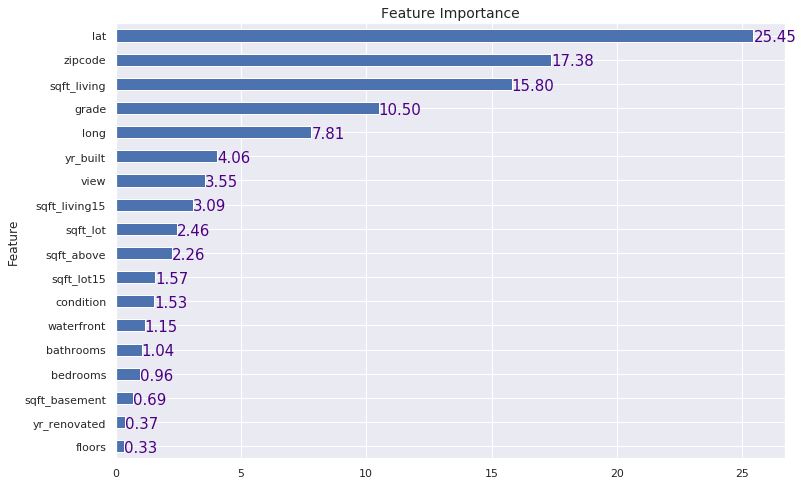

In [360]:
plot_feature_imp_catboost(model, features_raw_all)

In [361]:
import eli5

eli5.show_weights(model)

In [362]:
df_fimp = model.get_feature_importance(prettified=True)[['Importances','Feature Id']]
df_fimp.style.background_gradient(subset=['Importances'])